In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the dataset (assuming it's a CSV file, replace the file path accordingly)
df = pd.read_csv('Customers.csv')


In [12]:
# Data Cleaning: Fill missing values
df["Profession"].fillna("Unknown", inplace=True)

In [13]:
# Encoding categorical columns
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df = pd.get_dummies(df, columns=["Profession"], drop_first=True)

In [14]:
# Selecting features and target
X = df.drop(columns=["CustomerID", "Spending Score (1-100)"])  # Features
y = (df["Spending Score (1-100)"] >= df["Spending Score (1-100)"].median()).astype(int)  # Binary classification


In [15]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Model Training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Predictions
y_pred = model.predict(X_test)


In [21]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.37      0.42       196
           1       0.50      0.60      0.54       204

    accuracy                           0.49       400
   macro avg       0.48      0.49      0.48       400
weighted avg       0.48      0.49      0.48       400



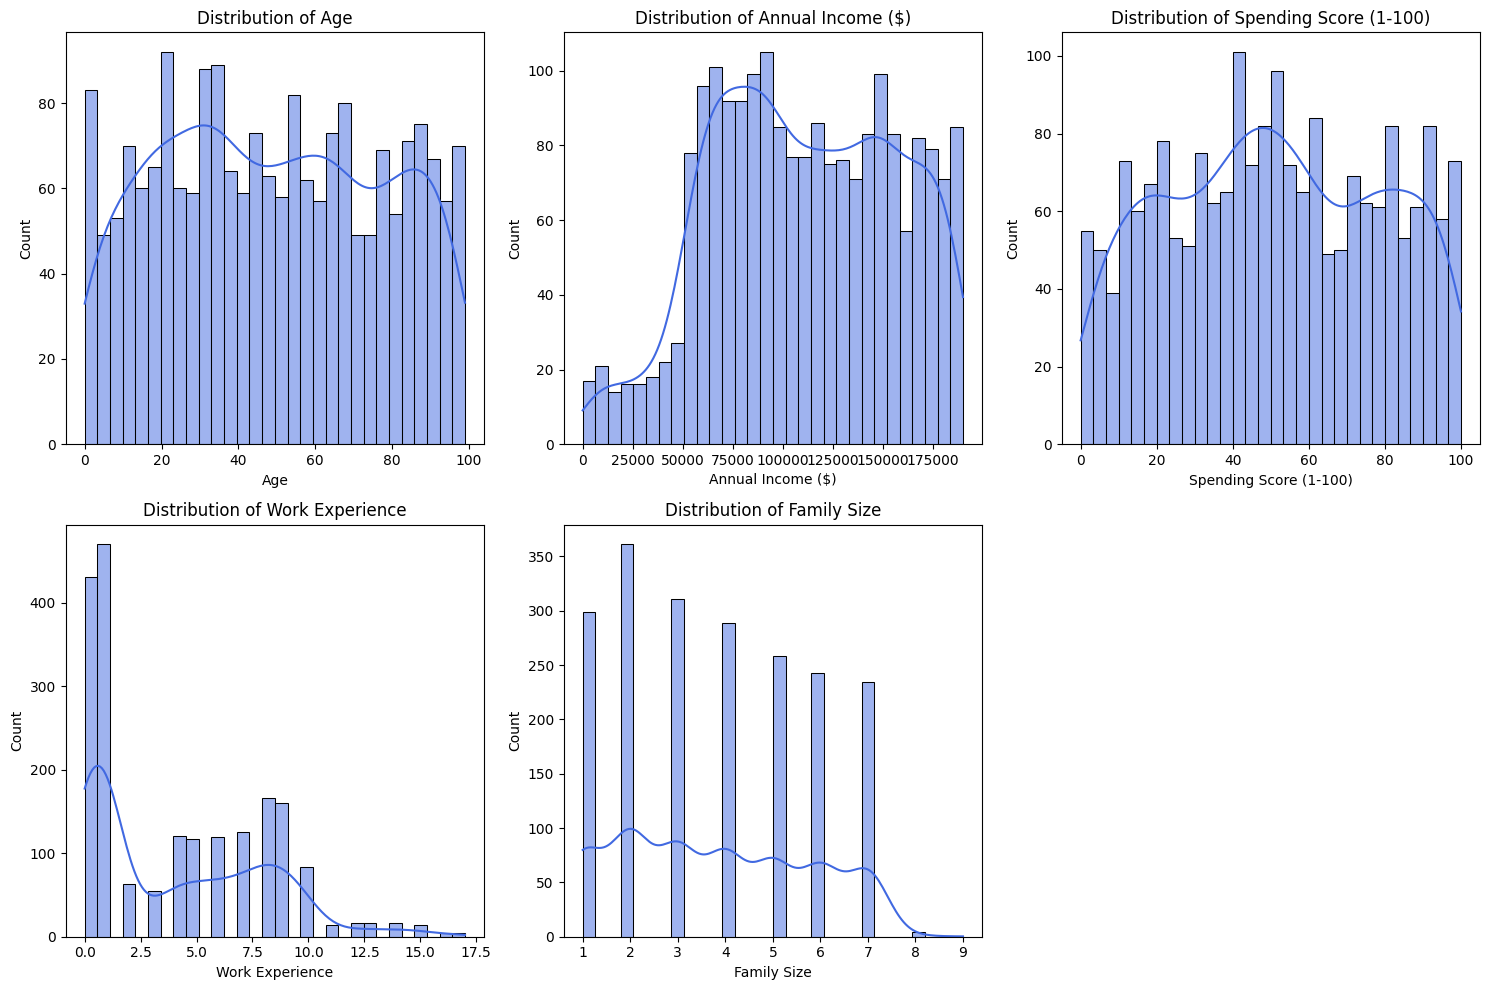

In [22]:
# Data Visualization: Histogram of numerical features
num_cols = ["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()
